# Chapter 4: Data Preprocessing
## By: Parisa Hormozzadeh

Before training machine learning models, data needs to be cleaned and transformed.
This notebook covers key preprocessing steps.

---

## 1. Why Data Preprocessing?
- Real-world data is often messy: missing values, incorrect types, inconsistent categories.
- Preprocessing ensures better model accuracy and stability.
- Helps algorithms understand the data properly.

---

## 2. Handling Missing Data
- Detect missing data using `isnull()` and `notnull()`
- Remove missing data with `dropna()`
- Impute missing data using `fillna()` or sklearn's `SimpleImputer`

---

In [1]:
import pandas as pd
import numpy as np

data = {'Voltage': [220, 230, np.nan, 225],
        'Current': [10, np.nan, 9, 12],
        'Status': ['ON', 'OFF', 'ON', None]}
df = pd.DataFrame(data)
print("Original DataFrame:")
df

Original DataFrame:


Voltage  Current Status
0    220.0     10.0     ON
1    230.0      NaN    OFF
2      NaN      9.0     ON
3    225.0     12.0   None

In [2]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Voltage    1
Current    1
Status     1
dtype: int64


In [3]:
# Drop rows with any missing value
df_drop = df.dropna()
print("\nDataFrame after dropping missing rows:")
df_drop


DataFrame after dropping missing rows:


Voltage  Current Status
0    220.0     10.0     ON

In [4]:
# Fill missing values
df_fill = df.fillna({'Voltage': df['Voltage'].mean(),
                      'Current': df['Current'].median(),
                      'Status': 'UNKNOWN'})
print("DataFrame after filling missing values:")
df_fill

DataFrame after filling missing values:


Voltage  Current   Status
0    220.0     10.0       ON
1    230.0     10.0      OFF
2    225.0      9.0       ON
3    225.0     12.0  UNKNOWN

## 3. Data Type Conversion
- Sometimes columns are read as wrong type (e.g., numbers as strings).
- Convert types using `astype()`.

---

In [5]:
df_fill['Current'] = df_fill['Current'].astype(float)
print(df_fill.dtypes)

Voltage    float64
Current    float64
Status      object
dtype: object


## 4. Encoding Categorical Variables
Machine learning models require numerical input.
- Label Encoding: convert categories to integers (good for ordinal data)
- One-Hot Encoding: create dummy variables for each category

---

| Feature            | **Label Encoding**                                   | **One-Hot Encoding**                                     |
| ------------------ | ---------------------------------------------------- | -------------------------------------------------------- |
| What it does       | Converts each text category to **a single integer**  | Converts each category to **a separate column**          |
| Output shape       | **One new numeric column**                           | **Multiple binary (0/1) columns**                        |
| Example (`"FAIL"`) | `"FAIL"` → `0`                                       | `"FAIL"` → `[1, 0, 0]` in one-hot columns                |
| Good for           | Models that can handle numerical labels (e.g. trees) | Models that **need no assumed order** between categories |
| Risk               | Model may treat `2 > 1 > 0` as meaningful            | No such risk – categories stay independent               |
| When to use        | If categories have **natural order**                 | If categories are **nominal (no order)**                 |


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_fill['Status_Label'] = le.fit_transform(df_fill['Status'])
print("Label Encoded Status:")
df_fill[['Status', 'Status_Label']]

Label Encoded Status:


Status  Status_Label
0       ON             1
1      OFF             0
2       ON             1
3  UNKNOWN             2

In [7]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, dtype=int)  
status_encoded = onehot.fit_transform(df_fill[['Status']])
status_cols = onehot.get_feature_names_out(['Status'])

df_encoded = pd.DataFrame(status_encoded, columns=status_cols, index=df_fill.index)

df_fill_onehot = pd.concat([df_fill, df_encoded], axis=1)

print("One-Hot Encoded Status:")
df_fill_onehot[['Status'] + list(status_cols)]

One-Hot Encoded Status:


Status  Status_OFF  Status_ON  Status_UNKNOWN
0       ON           0          1               0
1      OFF           1          0               0
2       ON           0          1               0
3  UNKNOWN           0          0               1

## 5. Feature Scaling
Many ML algorithms work better if features are scaled.
- Min-Max Scaling (0 to 1)
- Standardization (zero mean, unit variance)

---

In [8]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

MinMaxScaler, StandardScaler

features = df_fill[['Voltage', 'Current']].copy()

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
features_minmax = scaler_minmax.fit_transform(features)
print("Min-Max Scaled Features:\n", features_minmax)

# Standard Scaling
scaler_std = StandardScaler()
features_std = scaler_std.fit_transform(features)
print("\nStandard Scaled Features:\n", features_std)

Min-Max Scaled Features:
 [[0.         0.33333333]
 [1.         0.33333333]
 [0.5        0.        ]
 [0.5        1.        ]]

Standard Scaled Features:
 [[-1.41421356 -0.22941573]
 [ 1.41421356 -0.22941573]
 [ 0.         -1.14707867]
 [ 0.          1.60591014]]


## 6. Splitting Data into Train and Test Sets
- To evaluate ML models, split data into training and testing sets.
- Use `train_test_split` from sklearn.

---

## 7. Move on to Real-world data
---

## 7.1. Load Data


In [9]:
import pandas as pd

data_set = pd.read_csv('power_consumption.csv')
data_set

Datetime  Temperature  Humidity  WindSpeed  \
0         1/1/2017 0:00        6.559      73.8      0.083   
1         1/1/2017 0:10        6.414      74.5      0.083   
2         1/1/2017 0:20        6.313      74.5      0.080   
3         1/1/2017 0:30        6.121      75.0      0.083   
4         1/1/2017 0:40        5.921      75.7      0.081   
...                 ...          ...       ...        ...   
52411  12/30/2017 23:10        7.010      72.4      0.080   
52412  12/30/2017 23:20        6.947      72.6      0.082   
52413  12/30/2017 23:30        6.900      72.8      0.086   
52414  12/30/2017 23:40        6.758      73.0      0.080   
52415  12/30/2017 23:50        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.100             29128.10127   
3                    0.091         0.096             28228.86076   
4                    0.048         0.085             27335.69620   
...                    ...           ...                     ...   
52411                0.040         0.096             31160.45627   
52412                0.051         0.093             30430.41825   
52413                0.084         0.074             29590.87452   
52414                0.066         0.089             28958.17490   
52415                0.062         0.111             28349.80989   

       PowerConsumption_Zone2  PowerConsumption_Zone3 PowerDemandCategory  
0                 16128.87538             20240.96386                 Low  
1                 19375.07599             20131.08434                 Low  
2                 19006.68693             19668.43373                 Low  
3                 18361.09422             18899.27711                 Low  
4                 17872.34043             18442.40964                 Low  
...                       ...                     ...                 ...  
52411             26857.31820             14780.31212                High  
52412             26124.57809             14428.81152                 Low  
52413             25277.69254             13806.48259                 Low  
52414             24692.23688             13512.60504                 Low  
52415             24055.23167             13345.49820                 Low  

[52416 rows x 10 columns]

## 7.2. Viewing and Inspecting Data
To get a quick overview of our DataFrame.

In [13]:
# Find out the dimension of the data frame 
data_set.shape 

(52416, 10)

In [14]:
# Find out what feachers we have
print(data_set.columns)

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3',
       'PowerDemandCategory'],
      dtype='object')


In [52]:
# Check data types
data_set.dtypes

Datetime                   object
Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
PowerDemandCategory        object
dtype: object

In [53]:
# View the first few rows
data_set.head()

Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3 PowerDemandCategory  
0             20240.96386                 Low  
1             20131.08434                 Low  
2             19668.43373                 Low  
3             18899.27711                 Low  
4             18442.40964                 Low

In [54]:
# Group by a column and calculate mean
data_set.groupby('PowerDemandCategory').mean()

Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
PowerDemandCategory                                                           
High                   21.278787  64.323420   2.365279           230.415928   
Low                    16.736819  71.566339   1.618093           142.606359   

                     DiffuseFlows  PowerConsumption_Zone1  \
PowerDemandCategory                                         
High                    78.179242            38550.101491   
Low                     72.380598            27131.876366   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  
PowerDemandCategory                                                  
High                           25066.862479            22807.996546  
Low                            17661.543622            13657.801896

In [55]:
# Select several rows
data_set[20 : 26]

Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
20  1/1/2017 3:20        5.041      77.2      0.081                0.062   
21  1/1/2017 3:30        5.034      76.9      0.083                0.051   
22  1/1/2017 3:40        4.896      76.6      0.085                0.070   
23  1/1/2017 3:50        4.805      76.2      0.081                0.059   
24  1/1/2017 4:00        4.753      75.7      0.083                0.044   
25  1/1/2017 4:10        4.901      74.4      0.083                0.070   

    DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
20         0.152             20870.88608             13196.35258   
21         0.185             20870.88608             13167.17325   
22         0.137             20597.46835             13137.99392   
23         0.134             20421.26582             12908.20669   
24         0.134             20524.55696             12820.66869   
25         0.122             20482.02532             13032.21884   

    PowerConsumption_Zone3 PowerDemandCategory  
20             15013.01205                 Low  
21             14897.34940                 Low  
22             14602.40964                 Low  
23             14590.84337                 Low  
24             14585.06024                 Low  
25             14452.04819                 Low

In [16]:
# Select the first 1 rows and first 6 columns
data_set.iloc[:2, 2:3]

Humidity
0      73.8
1      74.5

In [57]:
# Selecting a single column
data_set['Temperature']

0        6.559
1        6.414
2        6.313
3        6.121
4        5.921
         ...  
52411    7.010
52412    6.947
52413    6.900
52414    6.758
52415    6.580
Name: Temperature, Length: 52416, dtype: float64

In [58]:
# Selecting multiple columns
data_set[['Temperature', 'Humidity']]

Temperature  Humidity
0            6.559      73.8
1            6.414      74.5
2            6.313      74.5
3            6.121      75.0
4            5.921      75.7
...            ...       ...
52411        7.010      72.4
52412        6.947      72.6
52413        6.900      72.8
52414        6.758      73.0
52415        6.580      74.1

[52416 rows x 2 columns]

In [59]:
# Rename columns
#old_name ==> Temperature
#new_name ==> Temp
data_set.rename(columns={'old_name': 'new_name'}, inplace=True)

In [60]:
# Descriptive Statistics
data_set.describe()

Temperature      Humidity    WindSpeed  GeneralDiffuseFlows  \
count  50320.000000  52416.000000  52366.00000         52416.000000   
mean      18.813650     68.259518      1.95924           182.696614   
std        5.811728     15.551177      2.34881           264.400960   
min        3.247000     11.340000      0.05000             0.004000   
25%       14.420000     58.310000      0.07800             0.062000   
50%       18.780000     69.860000      0.08600             5.035500   
75%       22.900000     81.400000      4.91500           319.600000   
max       40.010000     94.800000      6.48300          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.696200             8560.081466   
25%        0.122000            26310.668692            16980.766032   
50%        4.456000            32265.920340            20823.168405   
75%      101.000000            37309.018185            24713.717520   
max      936.000000            52204.395120            37408.860760   

       PowerConsumption_Zone3  
count            52416.000000  
mean             17835.406218  
std               6622.165099  
min               5935.174070  
25%              13129.326630  
50%              16415.117470  
75%              21624.100420  
max              47598.326360

## 7.3. Preprocessing
### 7.3.1. Missing values

#### A) Identifying Missing Data

In [61]:
# Check for missing values
missing_values = data_set.isnull().sum()
print(missing_values)

Datetime                     0
Temperature               2096
Humidity                     0
WindSpeed                   50
GeneralDiffuseFlows          0
DiffuseFlows                 0
PowerConsumption_Zone1       0
PowerConsumption_Zone2       0
PowerConsumption_Zone3       0
PowerDemandCategory          0
dtype: int64


#### B) Dropping Missing Values
Drop rows or columns with missing values

In [17]:
# Drop rows with NaN values
ver1_data_set = data_set.dropna(inplace=False)
ver1_data_set.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
PowerDemandCategory       0
dtype: int64

In [18]:
ver1_data_set.shape

(50272, 10)

#### C) Filling Missing Values

A. Using a Constant Value


In [63]:
# Fill missing values with a specific constant, such as 0 or a placeholder
data_set['Temperature'].fillna(0, inplace=True)

B. Forward Fill (Propagation)

In [64]:
# Fill missing values with the last valid observation:
data_set.fillna(method='ffill', inplace=True)

C. Backward Fill


In [66]:
#Fill missing values with the next valid observation:
data_set.fillna(method='bfill', inplace=True)

D. Mean, Median, or Mode

In [68]:
# Fill with mean
mean_value = data_set['Temperature'].mean()
data_set['Temperature'].fillna(mean_value, inplace=True)

# Fill with median
median_value = data_set['Temperature'].median()
data_set['Temperature'].fillna(median_value, inplace=True)

# Fill with mode
mode_value = data_set['Temperature'].mode()[0]
data_set['Temperature'].fillna(mode_value, inplace=True)


#### D) Interpolate Missing Values

In [69]:
# Use interpolation to estimate missing values based on surrounding data points:
data_set['Temperature'].interpolate(method='linear', inplace=True) # Polynomial interpolation (quadratic)

## ❗ Always drop rows with missing target values before training/testing

### ⚠️ Why not fill missing values in y? Because:

#### For classification, guessing a label introduces noise and ruins accuracy.

#### For regression, using an average or median introduces bias and defeats the point of prediction.

### 7.3.2. Visualizing

#### A) correlation matrix

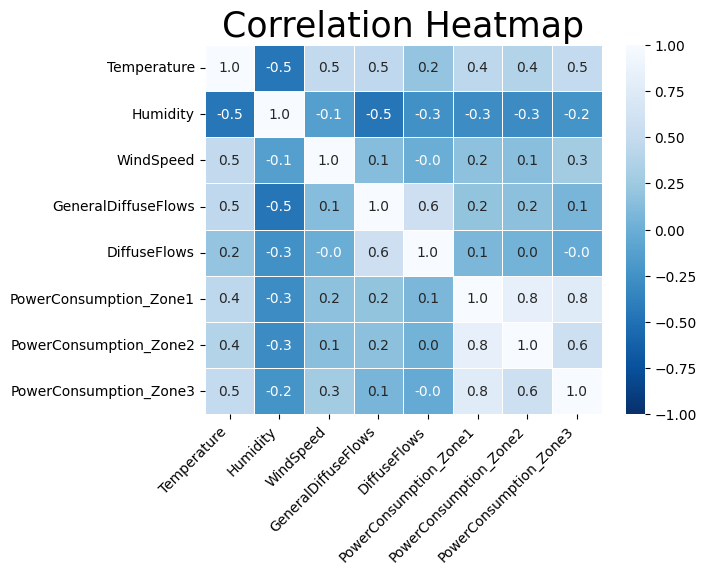

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a heatmap for the correlation matrix
plt.figure()
sns.heatmap(data_set.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f", linewidths=.5, cmap='Blues_r')
plt.title('Correlation Heatmap' , fontsize=25 )
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.show()

# PowerDemandCategory is not here :) 

#### B) Histogram

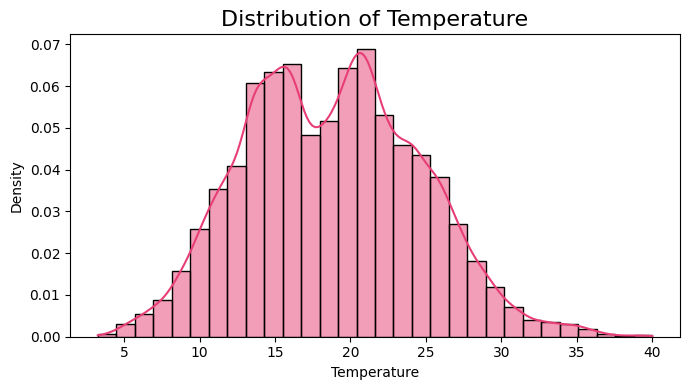

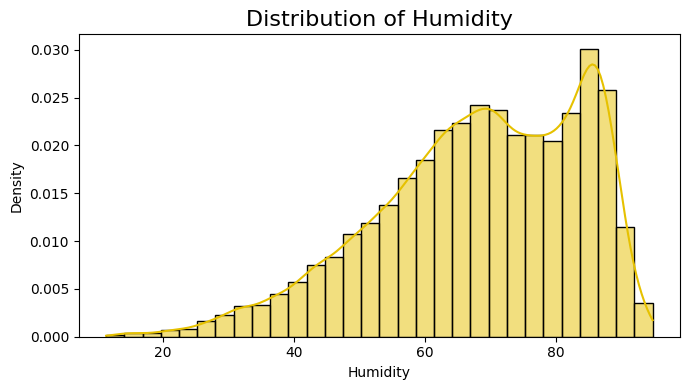

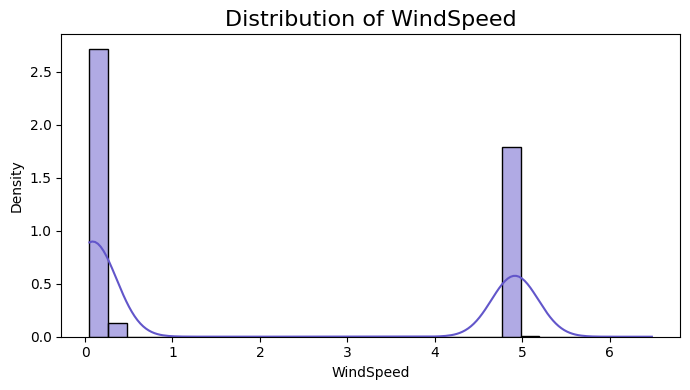

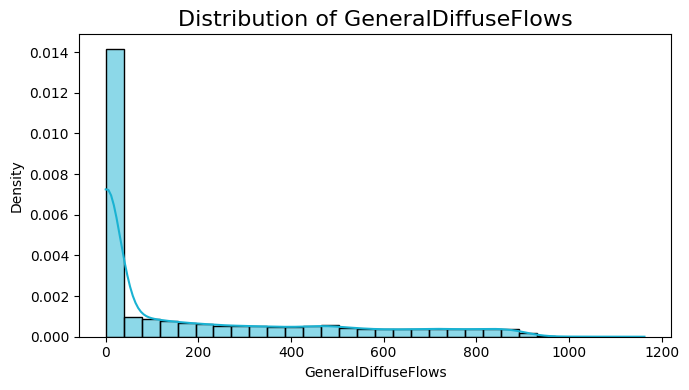

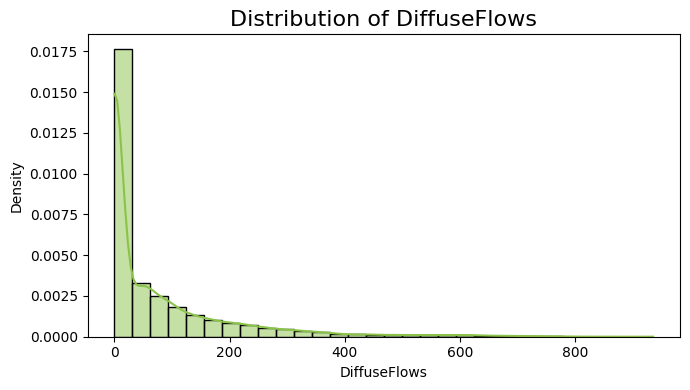

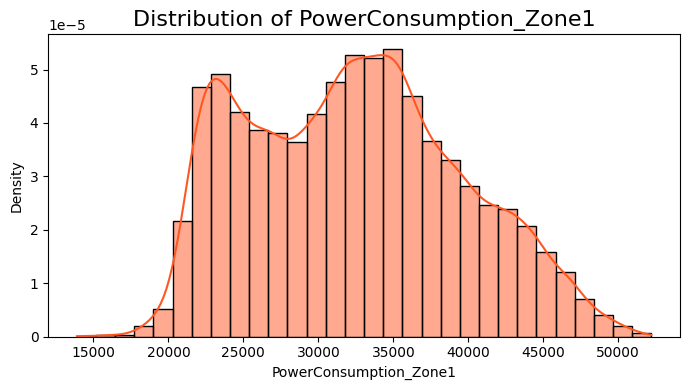

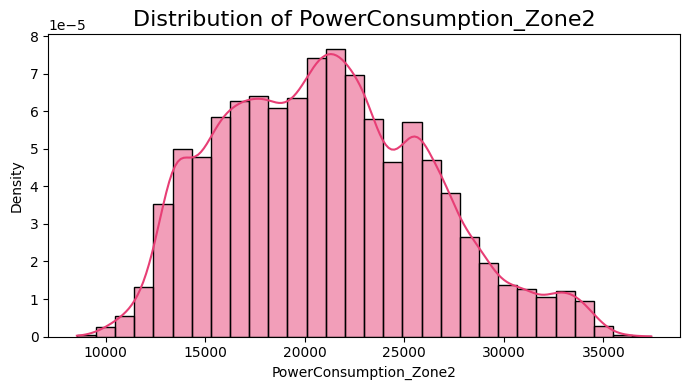

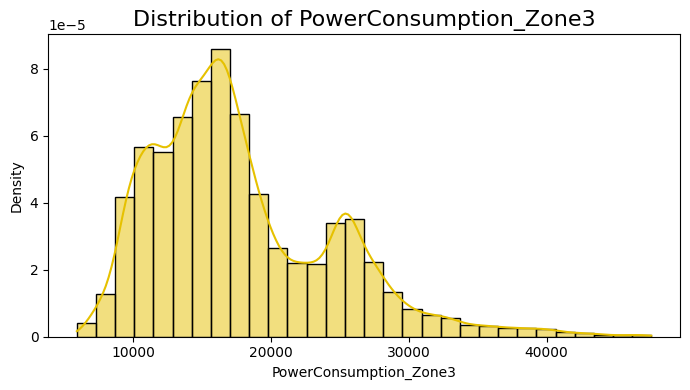

In [12]:
numeric_columns = data_set.select_dtypes(include=['float64', 'int64']).columns

colors = [
    '#e73e75', 
    '#e6c100',  
    '#6256CA',  
    '#1ab2d2', 
    '#8bc34a',  
    '#ff5722',  
]

# Plot histograms
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(7, 4))
    sns.histplot(data_set[col], bins=30, kde=True, color=colors[i % len(colors)],
                 edgecolor='black', stat='density')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

✅ When a Transformation Is a Good Idea
1. When the data is highly skewed (especially right-skewed)
If your data has a long tail on the right (many small values and a few very large ones), like DiffuseFlows in our case.

This helps stabilize variance and reduce the effect of outliers.

🔧 Use: log(x + 1), sqrt(x), or Box-Cox.

In [14]:
data_set['DiffuseFlows Log'] = np.log(data_set['DiffuseFlows'] + 1)

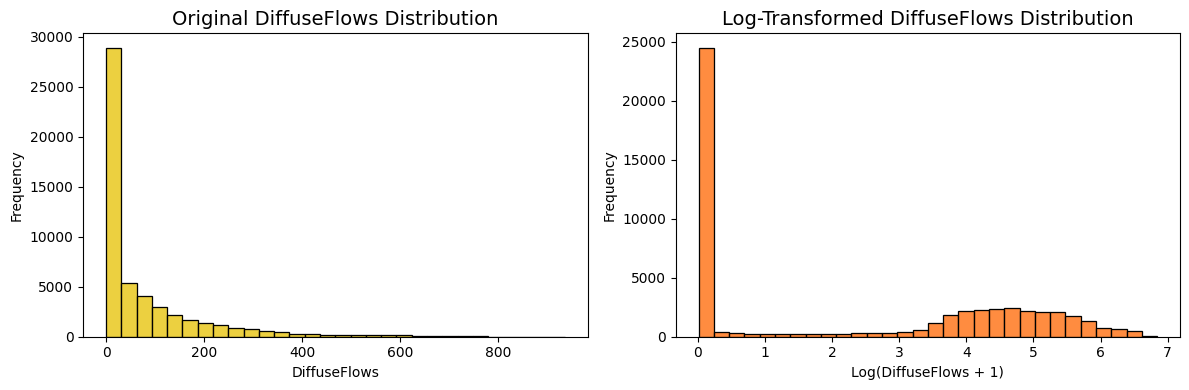

In [19]:

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data_set['DiffuseFlows'], ax=ax[0], color='#e6c100', bins=30, edgecolor='black')
ax[0].set_title('Original DiffuseFlows Distribution', fontsize=14)
ax[0].set_xlabel('DiffuseFlows')
ax[0].set_ylabel('Frequency')

sns.histplot(data_set['DiffuseFlows Log'], ax=ax[1], color='#FF6600', bins=30, edgecolor='black')
ax[1].set_title('Log-Transformed DiffuseFlows Distribution', fontsize=14)
ax[1].set_xlabel('Log(DiffuseFlows + 1)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

2. When your model assumes normality or linearity
Some models perform better with normally distributed inputs, or assume a linear relationship between features and target:



Transformation Often Helps?
Linear Regression ✅	
Logistic Regression ✅	
LDA (Linear Discriminant Analysis) ✅	
Neural Networks ❕ (sometimes)	
Tree-based Models (Random Forest, XGBoost) ❌ (not needed)

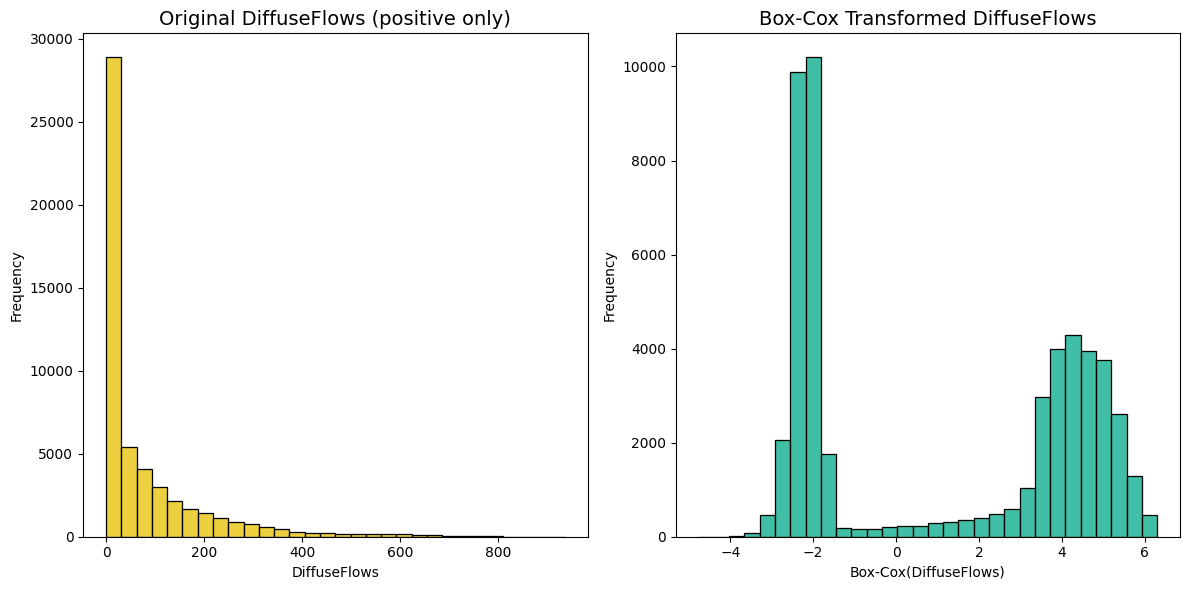

In [20]:
from scipy import stats

positive_diffuse = data_set['DiffuseFlows'][data_set['DiffuseFlows'] > 0]
boxcox_transformed, fitted_lambda = stats.boxcox(positive_diffuse)

data_set.loc[positive_diffuse.index, 'DiffuseFlows_BoxCox'] = boxcox_transformed

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(positive_diffuse, ax=ax[0], color='#e6c100', bins=30, edgecolor='black')
ax[0].set_title('Original DiffuseFlows (positive only)', fontsize=14)
ax[0].set_xlabel('DiffuseFlows')
ax[0].set_ylabel('Frequency')

sns.histplot(boxcox_transformed, ax=ax[1], color='#00aa88', bins=30, edgecolor='black')
ax[1].set_title('Box-Cox Transformed DiffuseFlows', fontsize=14)
ax[1].set_xlabel('Box-Cox(DiffuseFlows)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### C) Scatter Plot

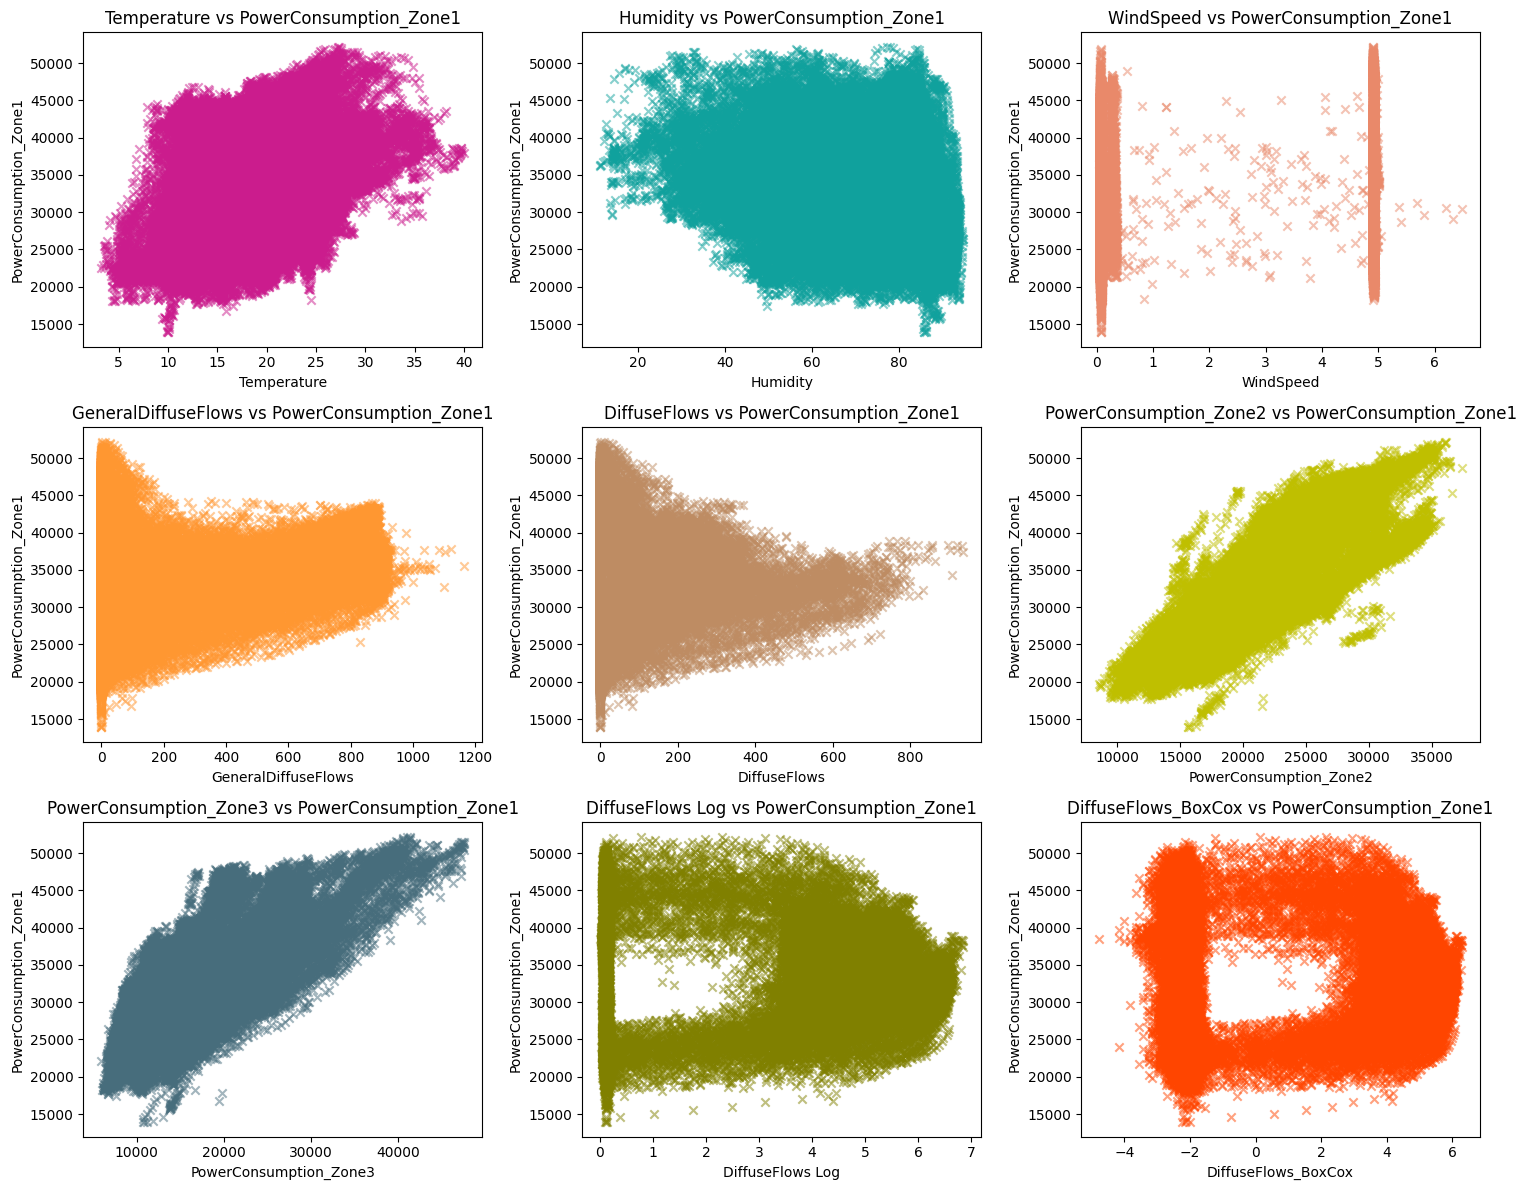

In [24]:
import matplotlib.pyplot as plt

features = data_set.select_dtypes(include='number').columns.drop('PowerConsumption_Zone1')

cols = 3
Color_list= ['#cb1c8d','#10a19d','#e9896a','#ff9731','#be8c63','y','#476d7c','olive','orangered','r']
rows = (len(features) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(data_set[feature], data_set['PowerConsumption_Zone1'], alpha=0.5, color=Color_list[i], marker='x')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('PowerConsumption_Zone1')
    axes[i].set_title(f'{feature} vs PowerConsumption_Zone1')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### D) Box plot

 We'll draw a box plot for 'DiffuseFlows' as it's suitable for visualizing distribution and outliers


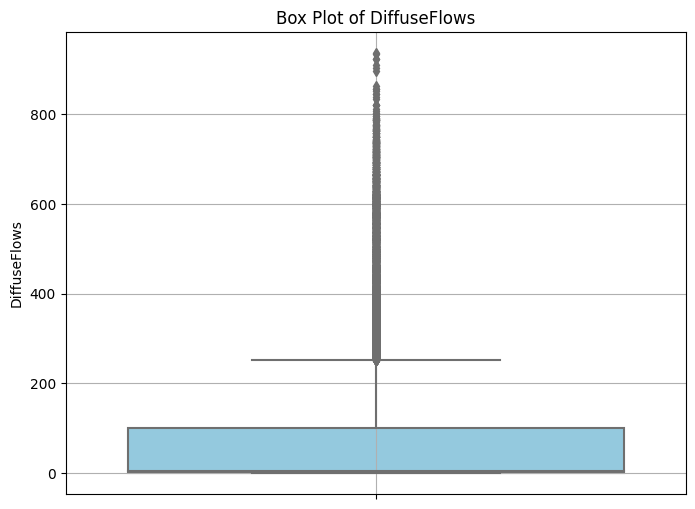

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data_set['DiffuseFlows'], color='skyblue')
plt.title('Box Plot of DiffuseFlows')
plt.ylabel('DiffuseFlows')
plt.grid(True)
plt.show()

### Bar chart for __cartegorical__

for PowerDemandCategory:

Since this is nominal data (categorical), a box plot is not appropriate. 

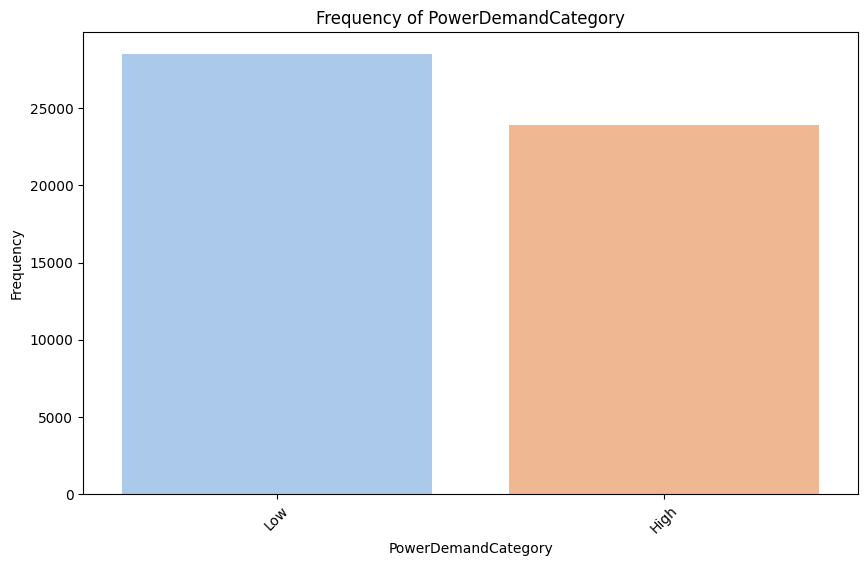

In [3]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='PowerDemandCategory', data=data_set, palette='pastel')
plt.title('Frequency of PowerDemandCategory')
plt.xlabel('PowerDemandCategory')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### E) Pie chart

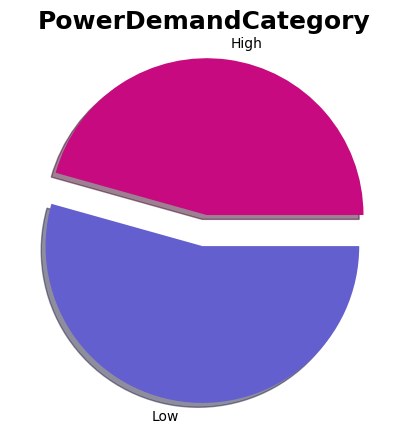

In [8]:
counts = data_set['PowerDemandCategory'].value_counts().sort_index()
colors = ['#C70A80', '#645FCE']

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=counts.index.tolist(),  
    explode=[0.2, 0],  
    shadow=True,
    colors=colors
)

plt.title('PowerDemandCategory', fontsize=18, fontweight='bold')
plt.axis('equal')  
plt.show()


#### F) Pair plot

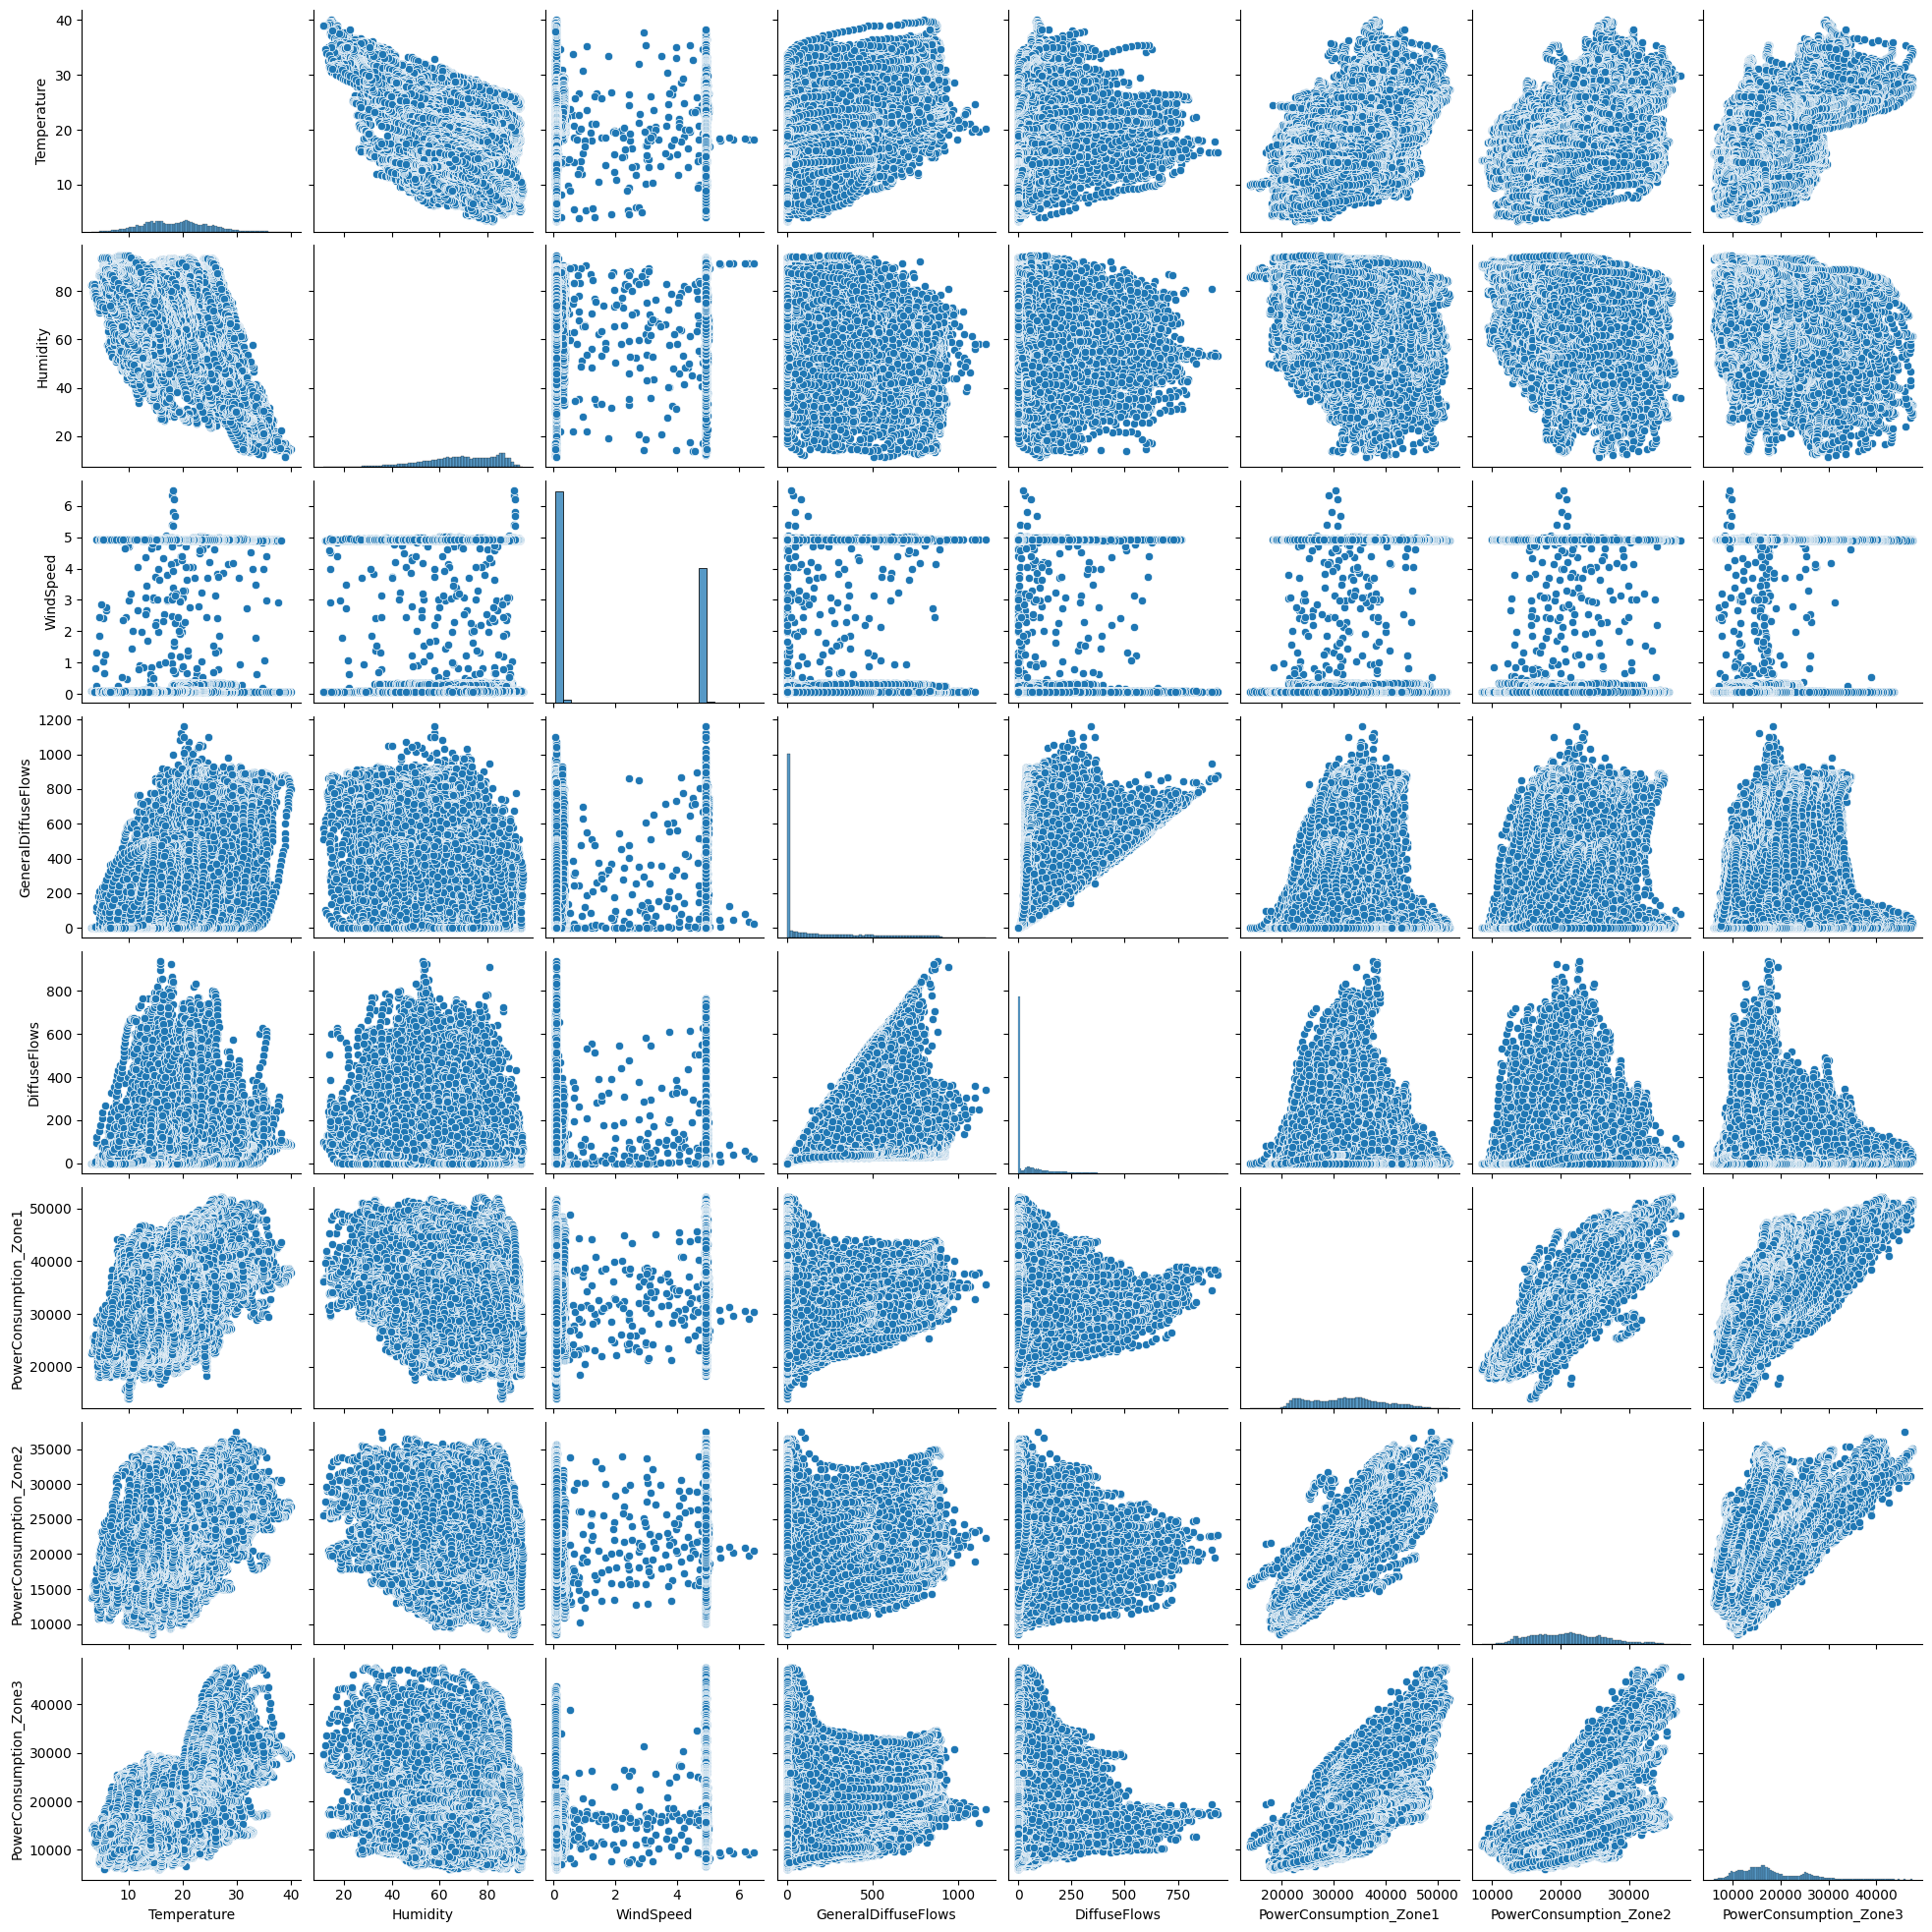

In [14]:
sns.pairplot( data_set )

## 7.4. Train & Test

In [34]:
X = data_set.drop('PowerConsumption_Zone1', axis=1)  # Features
y = data_set['PowerConsumption_Zone1']  # Target variable
y

0        34055.69620
1        29814.68354
2        29128.10127
3        28228.86076
4        27335.69620
            ...     
52411    31160.45627
52412    30430.41825
52413    29590.87452
52414    28958.17490
52415    28349.80989
Name: PowerConsumption_Zone1, Length: 52416, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42       # For reproducibility
)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 41932
Testing set size: 10484


In [28]:
# Train = 0.7
# Test = 0.2
# Validation = 0.1
from sklearn.model_selection import train_test_split

# First split the data into train and temp (train + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp

# Split the remaining temp data into test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.6667, random_state=42)  # 20% test, 10% validation

print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))


Train set size: 36691
Test set size: 5241
Validation set size: 10484


## 7.5. Handling Numeric and Nominal Data


In [29]:
# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
nominal_features = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'Numeric Features: {numeric_features}')
print(f'Nominal Features: {nominal_features}')


Numeric Features: ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'DiffuseFlows Log', 'DiffuseFlows_BoxCox']
Nominal Features: ['Datetime']


#### One-Hot Encoding (Train)

In [37]:
onehot = OneHotEncoder(sparse=False, dtype=int)
encoded_data = onehot.fit_transform(X_train[['PowerDemandCategory']])
encoded_cols = onehot.get_feature_names_out(['PowerDemandCategory'])

data_set_encoded = pd.DataFrame(encoded_data, columns=encoded_cols, index=X_train.index)

X_train = pd.concat([X_train, data_set_encoded], axis=1)
X_train


Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
26890   7/6/2017 17:40        30.17     52.03      4.926              432.100   
36038    9/8/2017 6:20        19.37     90.60      0.307                0.073   
27335   7/9/2017 19:50        29.97     33.98      4.916               70.700   
9666     3/9/2017 3:00        12.34     85.30      0.076                0.055   
1977   1/14/2017 17:30        18.10     62.42      0.089               73.800   
...                ...          ...       ...        ...                  ...   
11284   3/20/2017 8:40        10.48     89.90      0.082               42.590   
44732  11/7/2017 15:20        21.60     63.44      0.076              410.800   
38158  9/22/2017 23:40        22.98     50.05      4.922                0.088   
860     1/6/2017 23:20        12.37     76.40      0.085                0.055   
15795  4/20/2017 16:30        16.44     84.60      0.072               52.850   

       DiffuseFlows  PowerConsumption_Zone2  PowerConsumption_Zone3  \
26890       110.400             22993.67089             25299.41423   
36038         0.130             15200.83160             10937.52809   
27335        72.500             28765.82278             38801.67364   
9666          0.163             13547.56098             14533.54839   
1977         83.300             21793.31307             22108.91566   
...             ...                     ...                     ...   
11284        39.970             16836.58537             11792.90323   
44732       422.300             25568.18182             10773.97590   
38158         0.100             18654.88565             15873.83044   
860           0.119             20914.28571             20495.42169   
15795        44.550             28616.70061             18897.45455   

      PowerDemandCategory  DiffuseFlows Log  DiffuseFlows_BoxCox  \
26890                High          4.713127             4.444186   
36038                 Low          0.122218            -2.091855   
27335                High          4.297285             4.067332   
9666                  Low          0.151003            -1.854748   
1977                 High          4.434382             4.192202   
...                   ...               ...                  ...   
11284                 Low          3.712840             3.527053   
44732                 Low          6.048081             5.620949   
38158                 Low          0.095310            -2.368495   
860                  High          0.112435            -2.184879   
15795                High          3.818811             3.626069   

       PowerDemandCategory_High  PowerDemandCategory_Low  
26890                         1                        0  
36038                         0                        1  
27335                         1                        0  
9666                          0                        1  
1977                          1                        0  
...                         ...                      ...  
11284                         0                        1  
44732                         0                        1  
38158                         0                        1  
860                           1                        0  
15795                         1                        0  

[41932 rows x 13 columns]

#### One-Hot Encoding (Test)

In [39]:
onehot = OneHotEncoder(sparse=False, dtype=int)
encoded_data = onehot.fit_transform(X_test[['PowerDemandCategory']])
encoded_cols = onehot.get_feature_names_out(['PowerDemandCategory'])

data_set_encoded = pd.DataFrame(encoded_data, columns=encoded_cols, index=X_test.index)

X_test = pd.concat([X_test, data_set_encoded], axis=1)
X_test


Datetime  Temperature  Humidity  WindSpeed  \
15506   4/18/2017 16:20        22.76     29.73      0.085   
51943  12/27/2017 17:10        15.92     54.44      0.085   
212      1/2/2017 11:20        15.08     57.23      0.076   
11210   3/19/2017 20:20        12.42     72.30      0.081   
16307    4/24/2017 5:50        14.58     80.60      0.080   
...                 ...          ...       ...        ...   
9830     3/10/2017 6:20        12.10     90.00      0.084   
43422  10/29/2017 13:00        21.23     71.50      4.920   
17841    5/4/2017 21:30        17.88     58.59      0.084   
38030    9/22/2017 2:20        23.95     38.95      4.921   
31020    8/4/2017 10:00        26.92     71.30      4.905   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone2  \
15506              615.500       664.800             19396.74134   
51943               19.120        19.340             29803.00706   
212                396.600        40.660             20808.51064   
11210                0.062         0.148             23634.14634   
16307                0.018         0.204             12006.10998   
...                    ...           ...                     ...   
9830                 0.059         0.085             13368.29268   
43422              300.700       233.100             22563.48548   
17841                0.055         0.130             26102.78638   
38030                0.091         0.081             14792.93139   
31020              475.400       229.900             29853.00950   

       PowerConsumption_Zone3 PowerDemandCategory  DiffuseFlows Log  \
15506             17623.27273                 Low          6.500989   
51943             14417.28691                High          3.012589   
212               16458.79518                 Low          3.729541   
11210             25089.67742                High          0.138021   
16307             11531.63636                 Low          0.185649   
...                       ...                 ...               ...   
9830              13081.93548                 Low          0.081580   
43422             11905.16717                 Low          5.455748   
17841             25465.26316                High          0.122218   
38030             12473.13585                 Low          0.077887   
31020             25230.84639                High          5.441985   

       DiffuseFlows_BoxCox  PowerDemandCategory_High  PowerDemandCategory_Low  
15506             6.010326                         0                        1  
51943             2.857662                         1                        0  
212               3.542692                         0                        1  
11210            -1.955774                         1                        0  
16307            -1.620866                         0                        1  
...                    ...                       ...                      ...  
9830             -2.540747                         0                        1  
43422             5.104465                         0                        1  
17841            -2.091855                         1                        0  
38030            -2.591968                         0                        1  
31020             5.092362                         1                        0  

[10484 rows x 13 columns]

## 5) Normalization

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000]
}

df = pd.DataFrame(data)
df


Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000

In [45]:
features = df[['Age', 'Salary']]

### A) Min-Max Normalization
X' = (X- Xmin)/(Xmax - Xmin) ==> range [0, 1].

In [46]:
min_max_scaler = MinMaxScaler()
min_max_normalized = min_max_scaler.fit_transform(features)
df_min_max = pd.DataFrame(min_max_normalized, columns=['Age', 'Salary'])
print("Min-Max Normalization:\n", df_min_max)

'''
min_max_scaler = MinMaxScaler(feature_range=(0, 1))  # Default is (0, 1), change as needed
'''

Min-Max Normalization:
    Age  Salary
0  0.0     0.0
1  0.5     0.5
2  1.0     1.0


'\nmin_max_scaler = MinMaxScaler(feature_range=(0, 1))  # Default is (0, 1), change as needed\n'

### B) Z-score Normalization (Standardization)
X' = (X - mean)/ standard deviation

In [47]:
standard_scaler = StandardScaler()
standardized = standard_scaler.fit_transform(features)
df_standard = pd.DataFrame(standardized, columns=['Age', 'Salary'])
print("\nZ-score Normalization:\n", df_standard)


Z-score Normalization:
         Age    Salary
0 -1.224745 -1.224745
1  0.000000  0.000000
2  1.224745  1.224745
